In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm
import matplotlib.colors as colors
import geoplot as gplt
import matplotlib.animation as animation
from matplotlib.lines import Line2D

In [2]:
#Load in all shortwave data
Confirmed=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
Deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
print(Recovered)


Confirmed_geoframe = gpd.GeoDataFrame(
    Confirmed, geometry=gpd.points_from_xy(Confirmed.Long, Confirmed.Lat))
Deaths_geoframe = gpd.GeoDataFrame(
    Deaths, geometry=gpd.points_from_xy(Deaths.Long, Deaths.Lat))
Recovered_geoframe = gpd.GeoDataFrame(
    Recovered, geometry=gpd.points_from_xy(Recovered.Long, Recovered.Lat))

                       Province/State Country/Region        Lat       Long  \
0                                 NaN    Afghanistan  33.000000  65.000000   
1                                 NaN        Albania  41.153300  20.168300   
2                                 NaN        Algeria  28.033900   1.659600   
3                                 NaN        Andorra  42.506300   1.521800   
4                                 NaN         Angola -11.202700  17.873900   
..                                ...            ...        ...        ...   
239                               NaN       Botswana -22.328500  24.684900   
240                               NaN        Burundi  -3.373100  29.918900   
241                               NaN   Sierra Leone   8.460555 -11.779889   
242  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400 -68.238500   
243                               NaN         Malawi -13.254308  34.301525   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ... 

C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\tirth\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

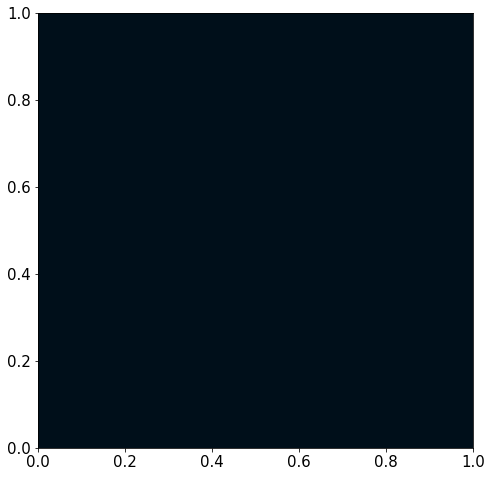

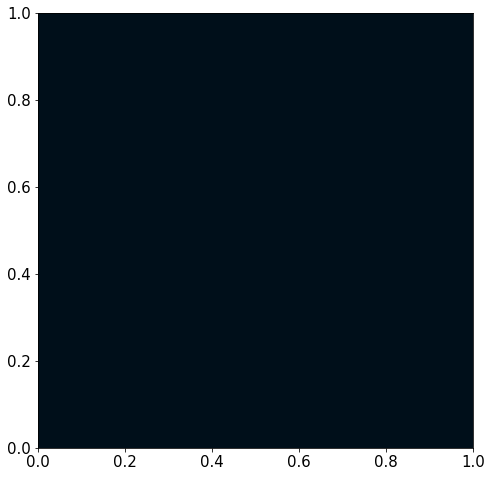

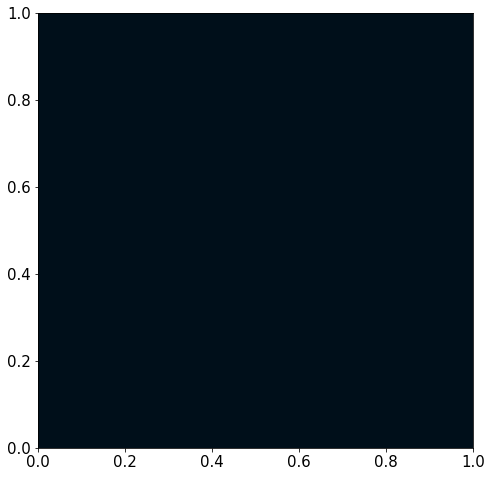

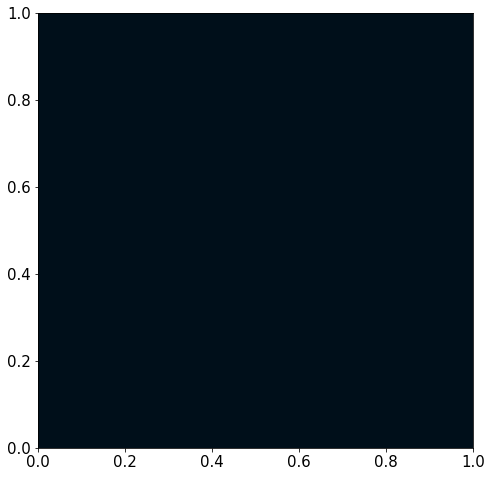

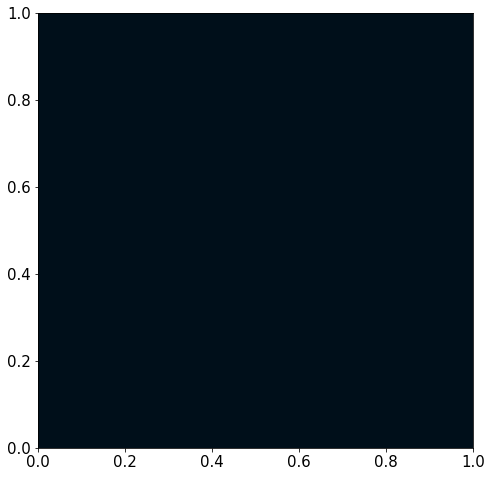

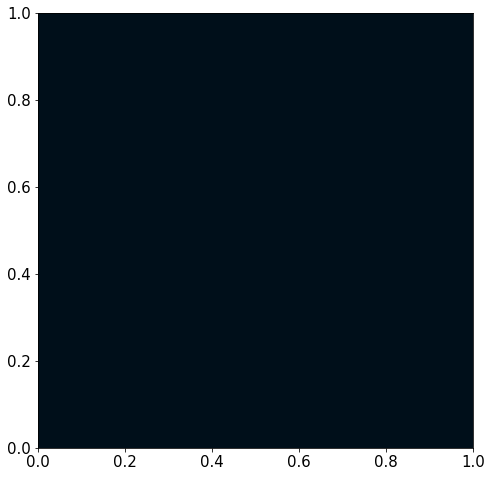

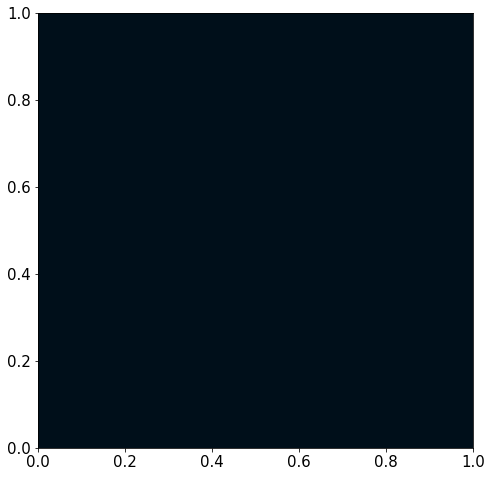

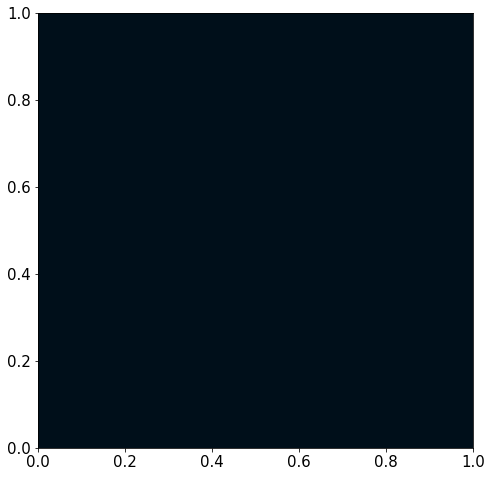

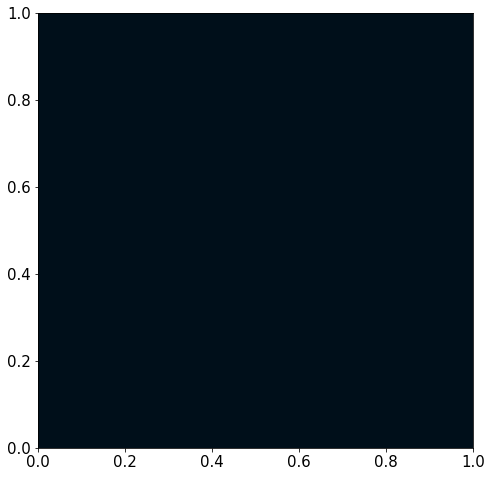

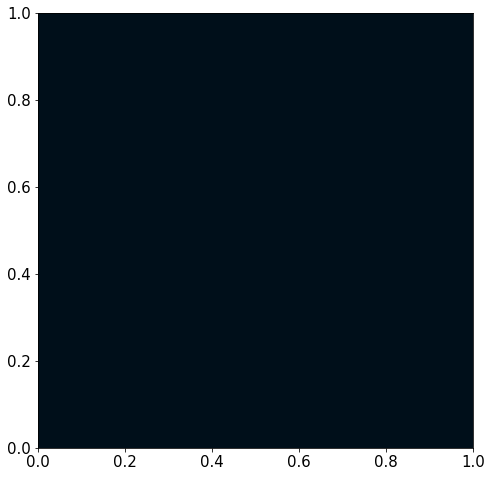

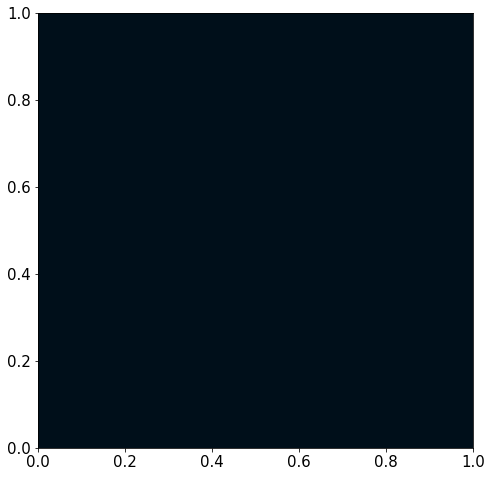

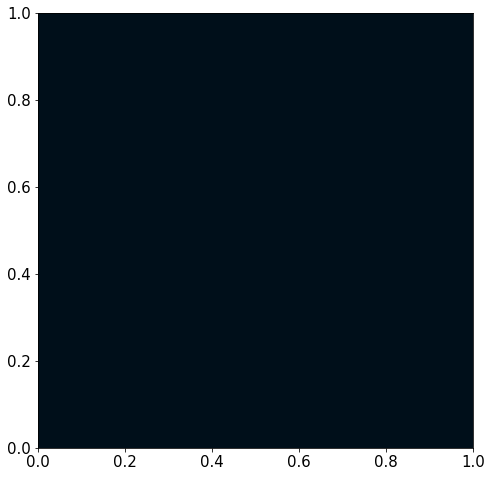

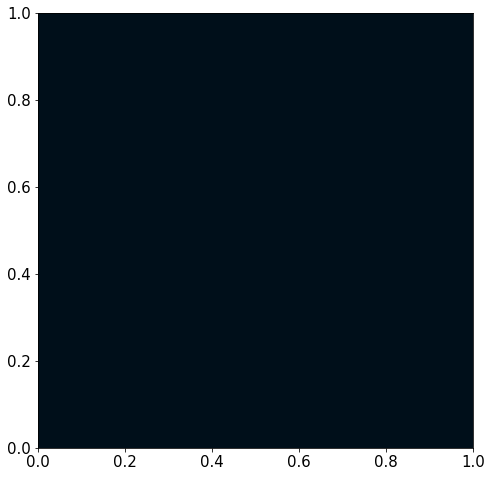

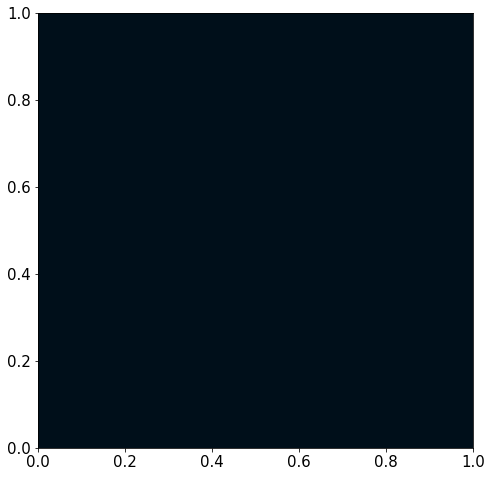

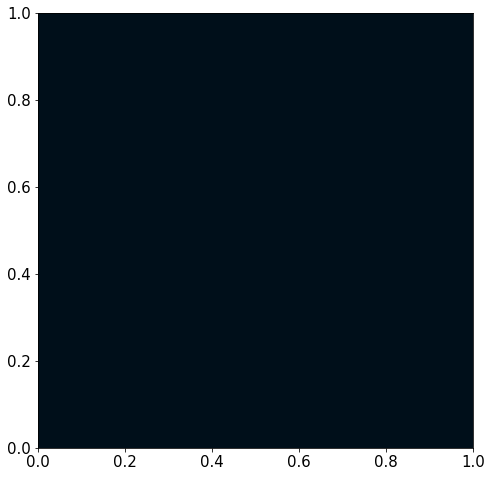

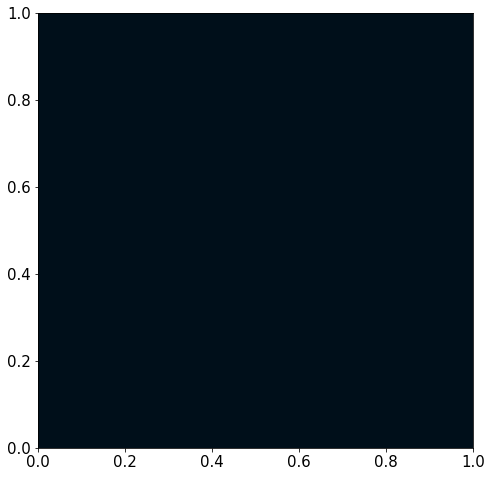

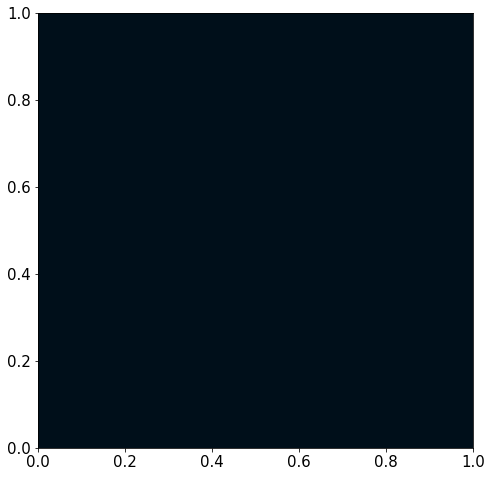

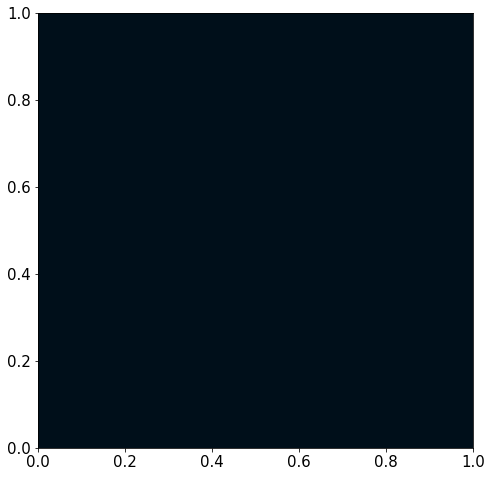

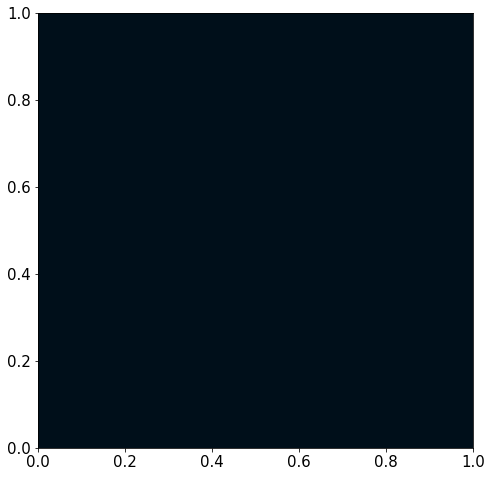

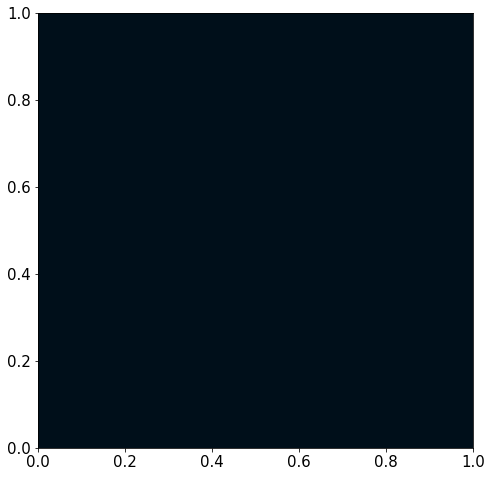

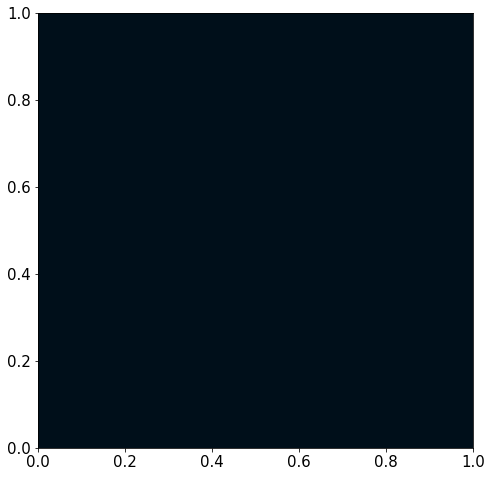

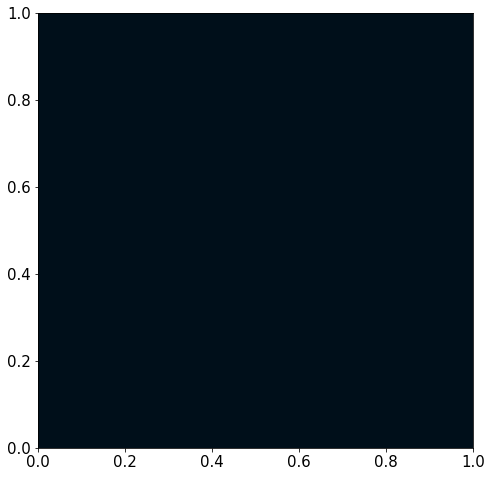

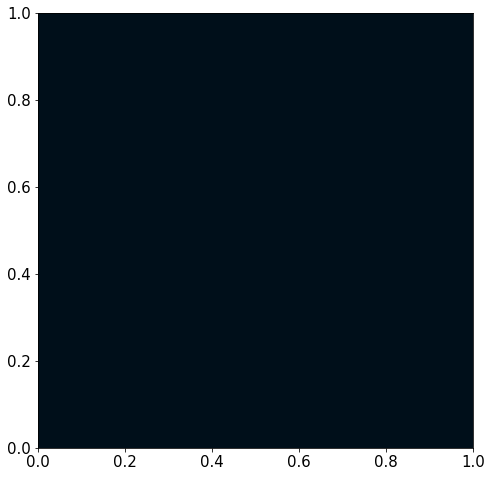

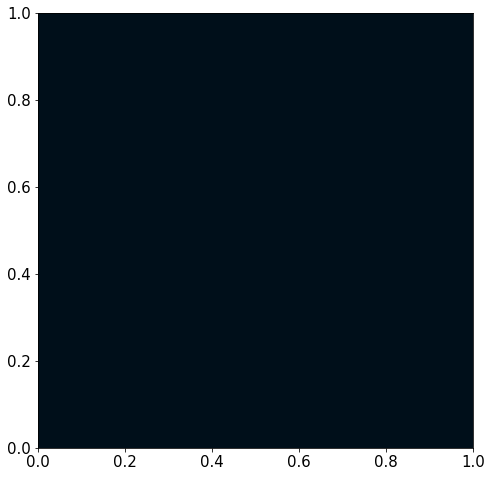

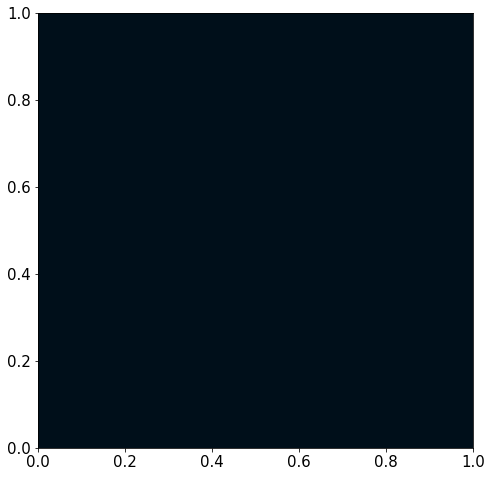

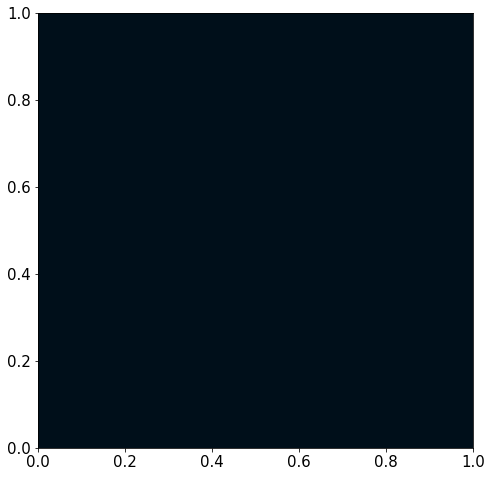

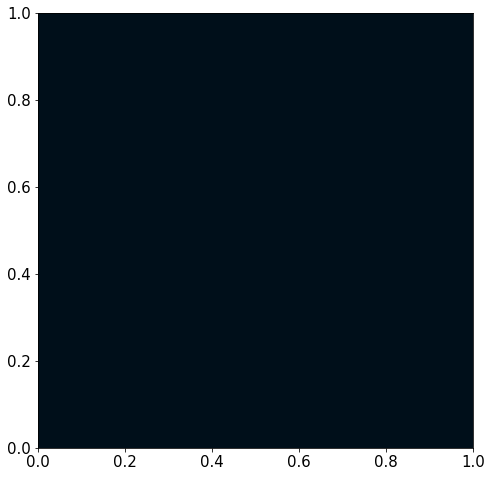

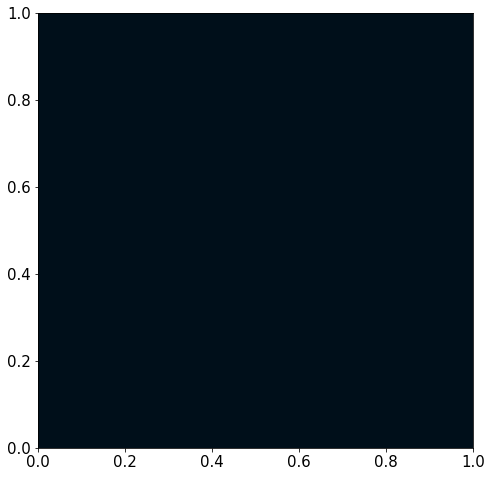

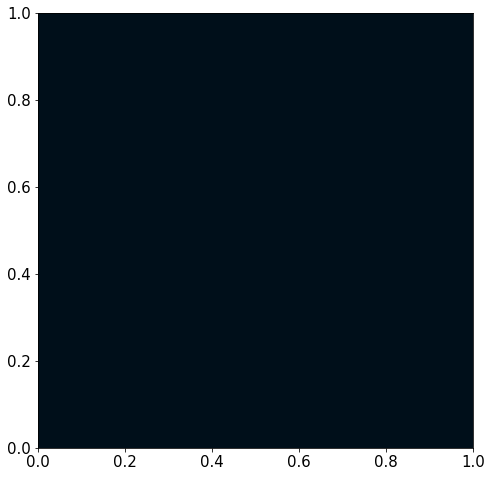

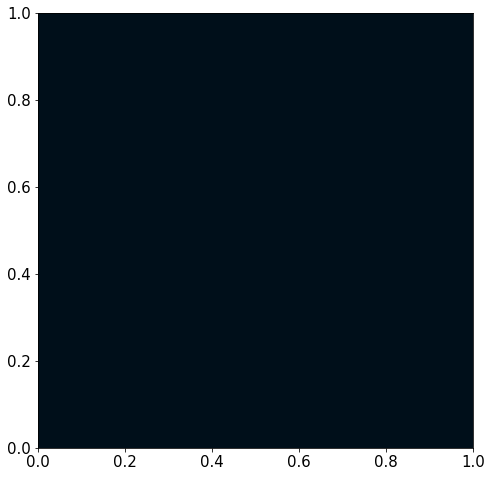

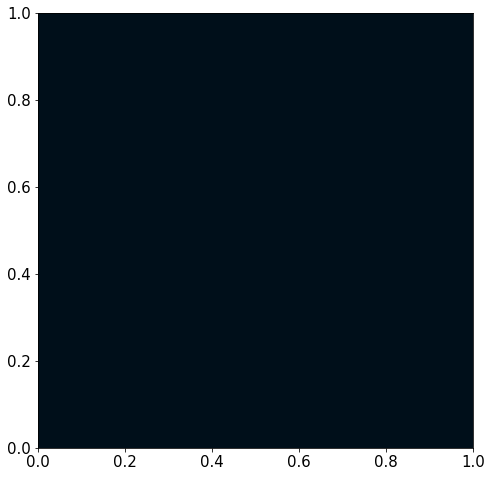

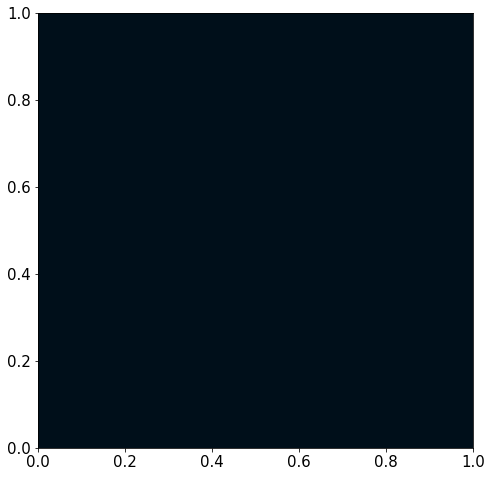

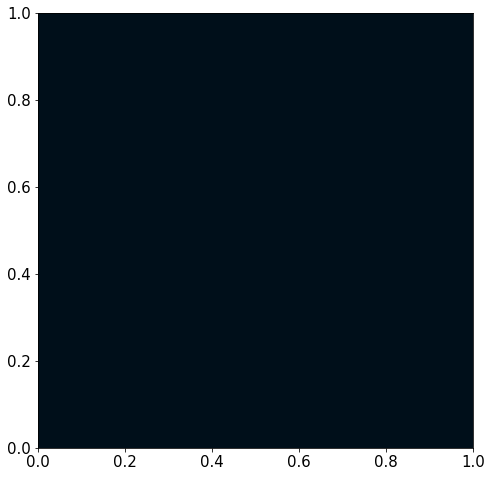

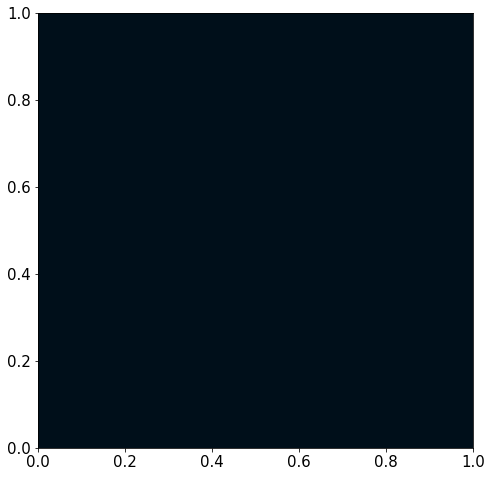

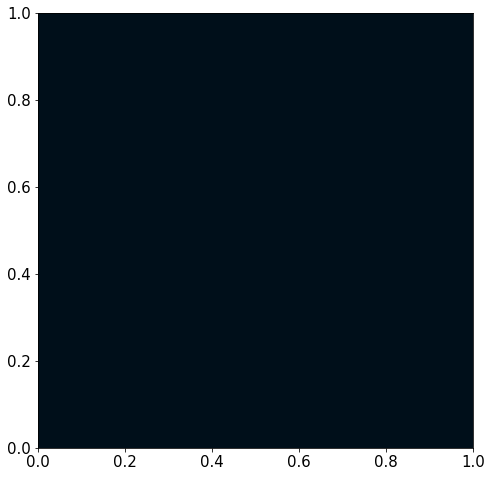

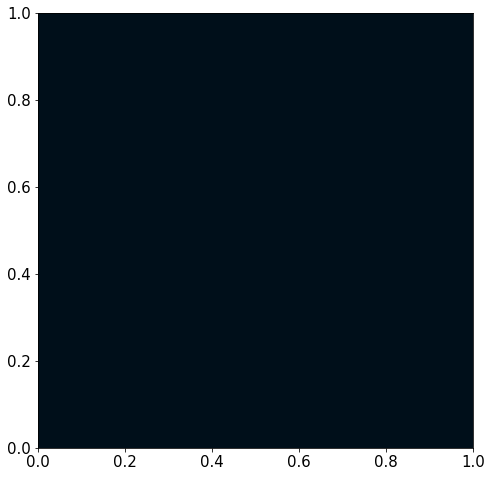

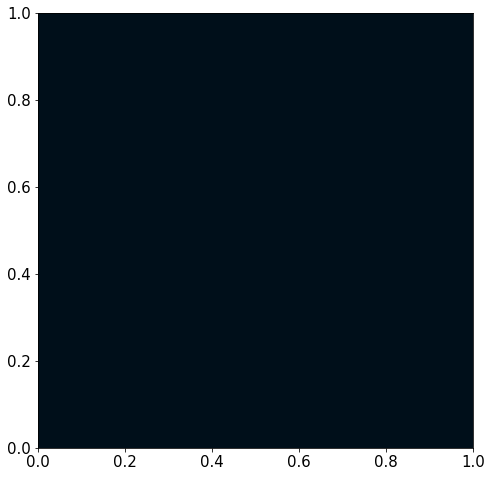

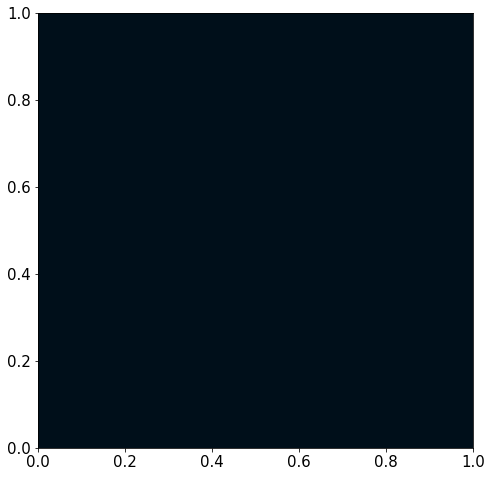

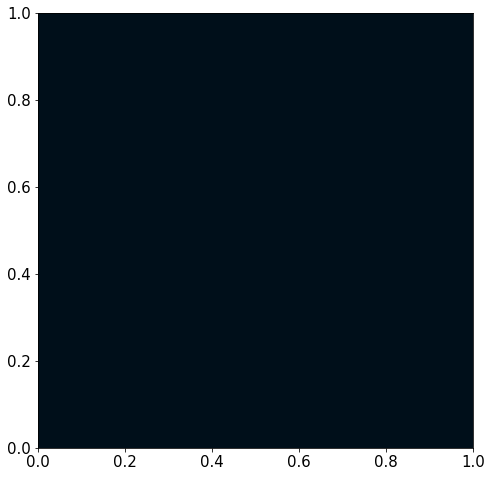

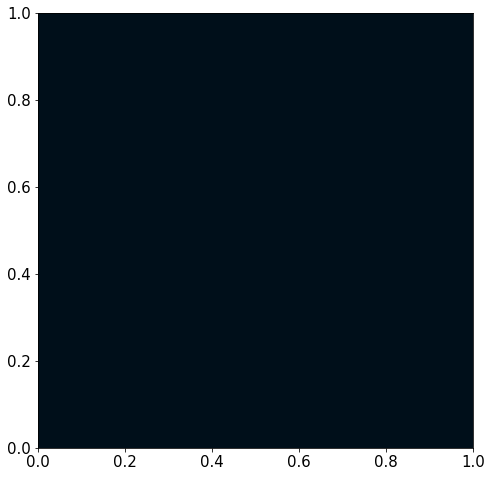

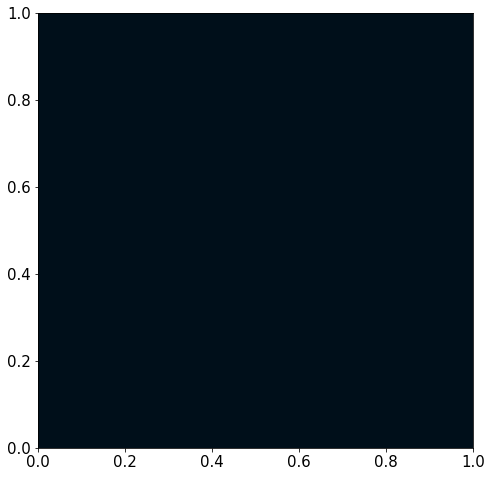

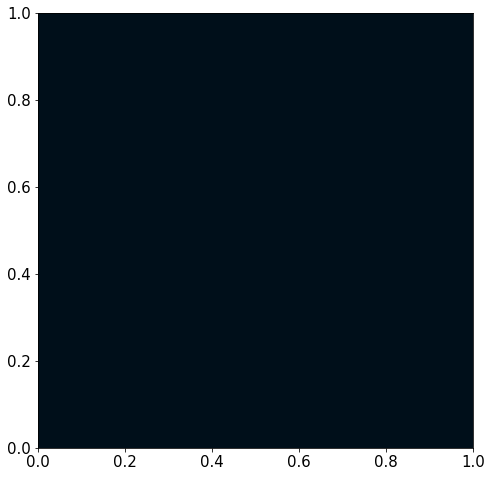

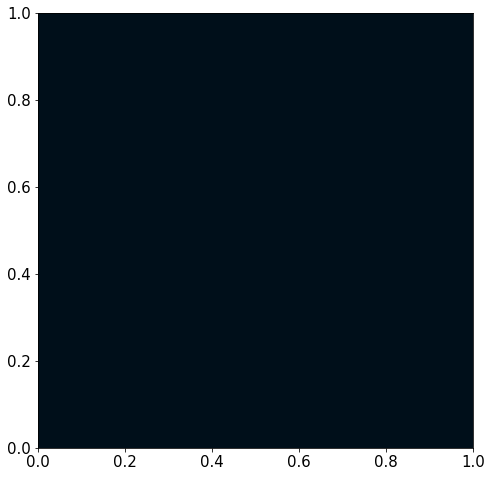

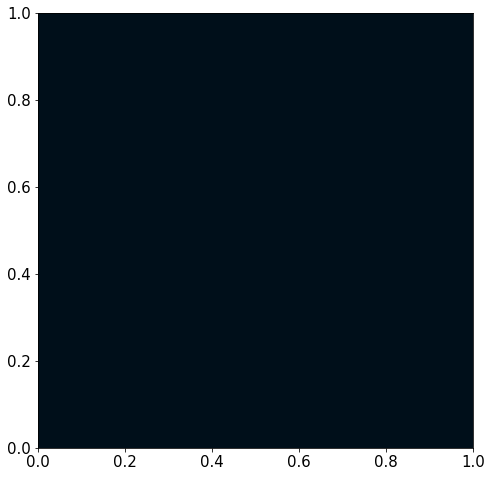

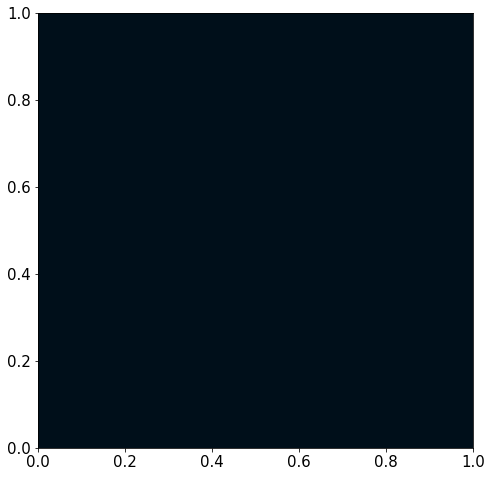

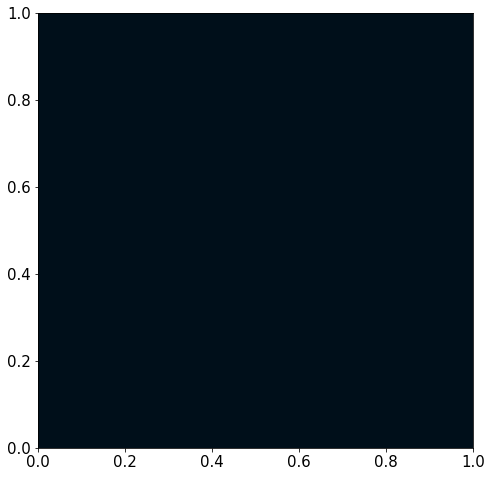

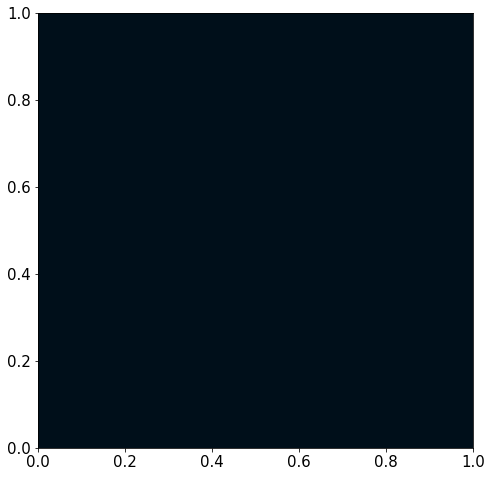

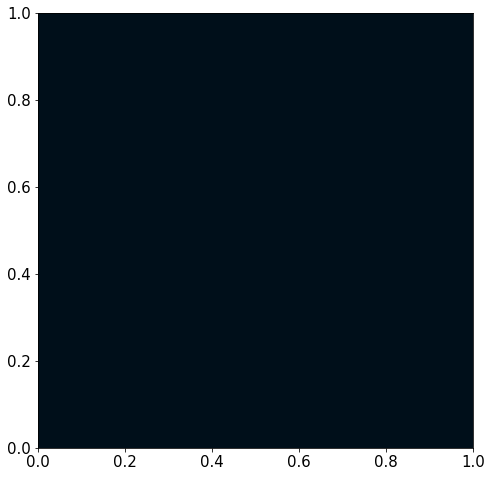

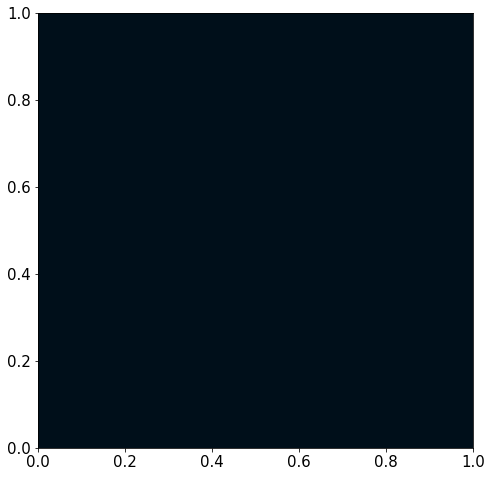

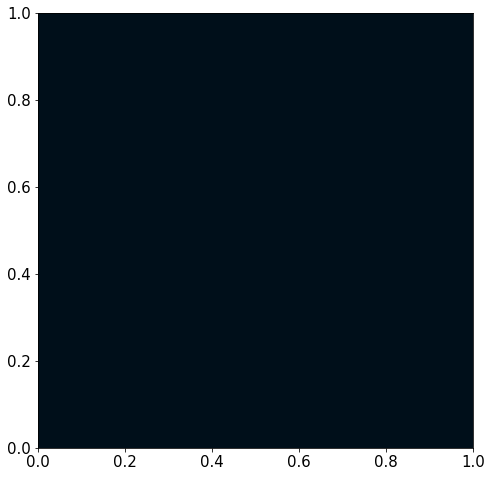

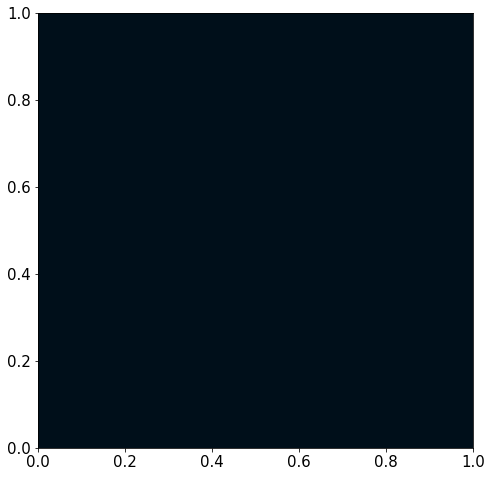

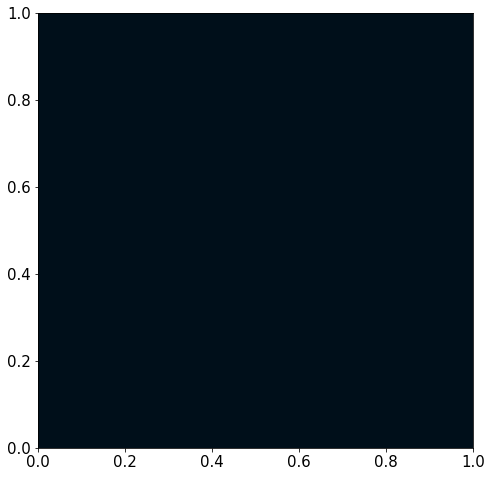

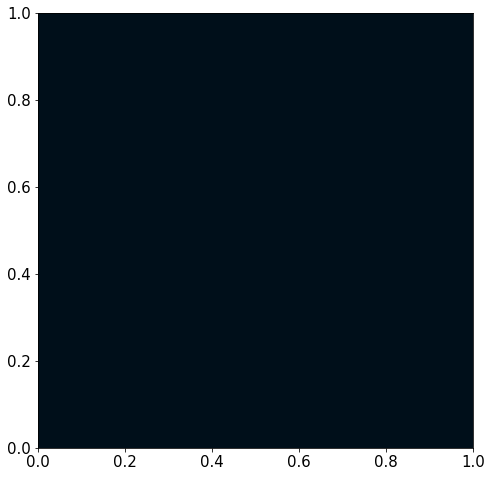

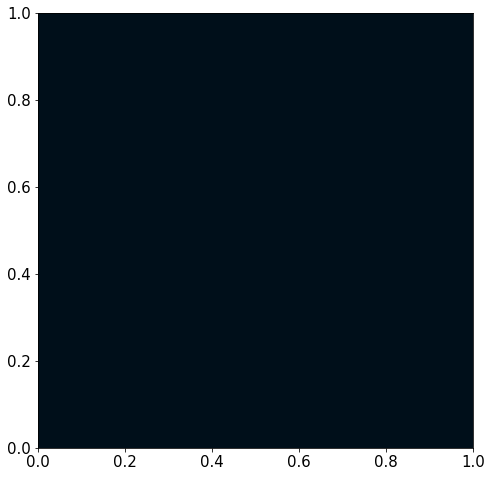

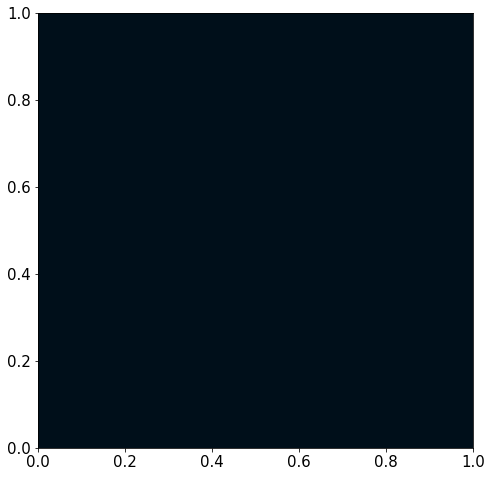

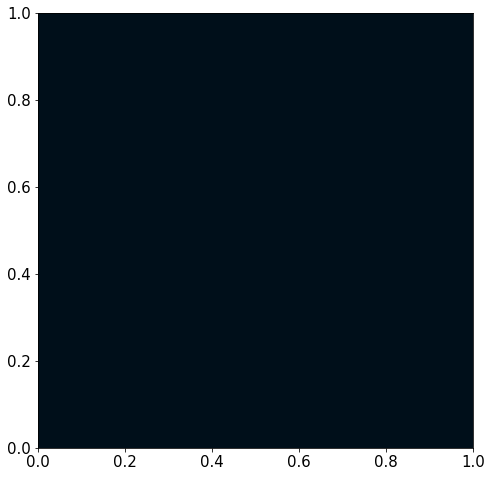

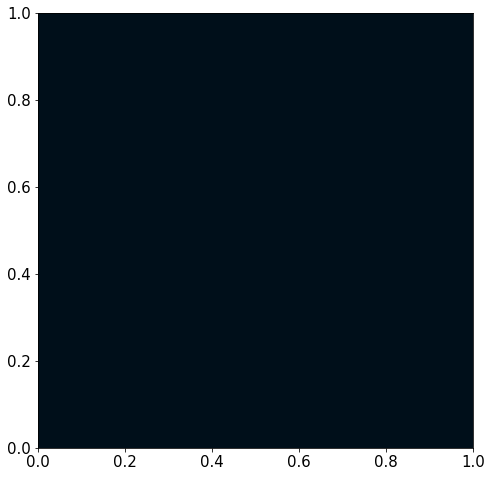

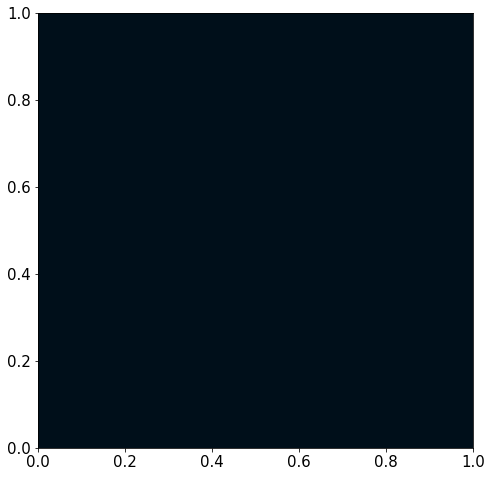

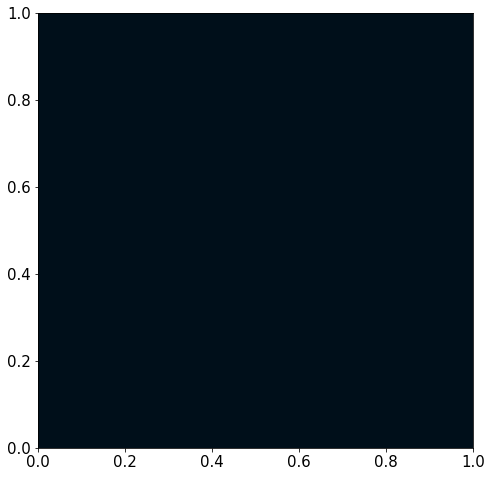

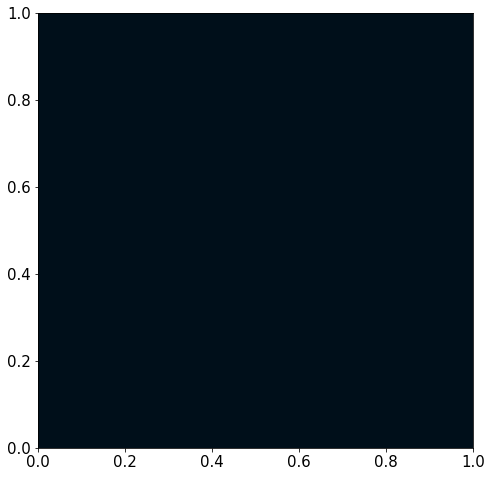

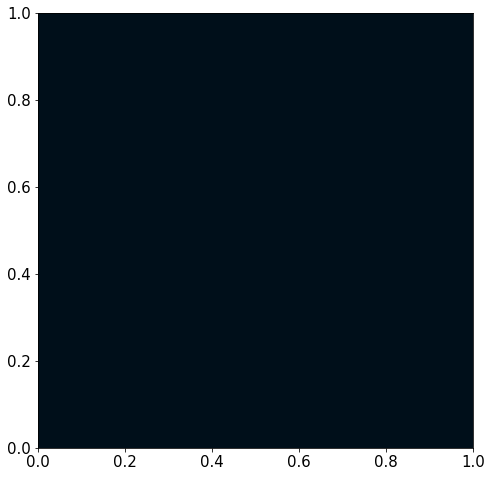

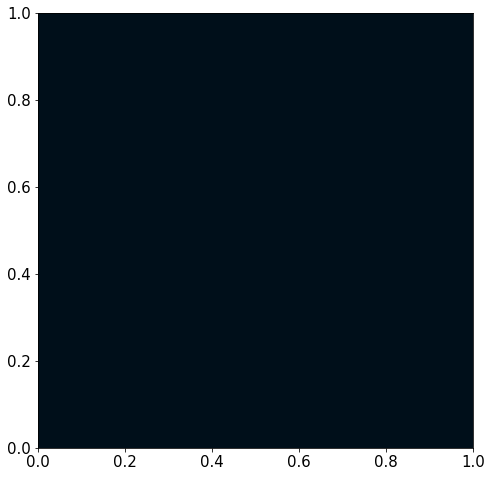

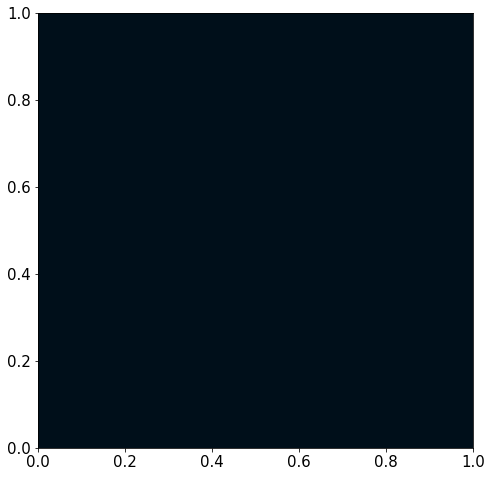

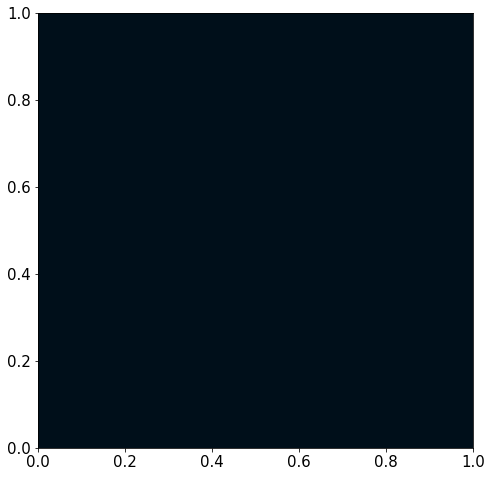

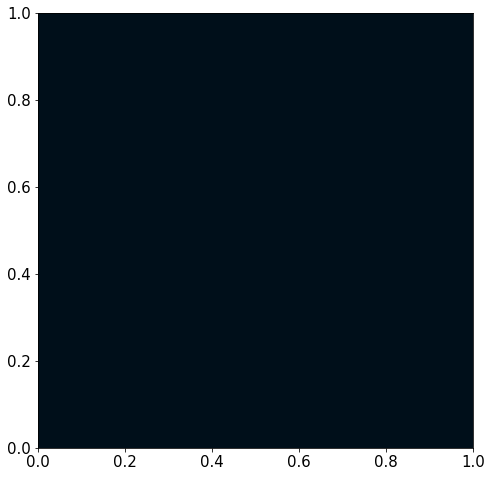

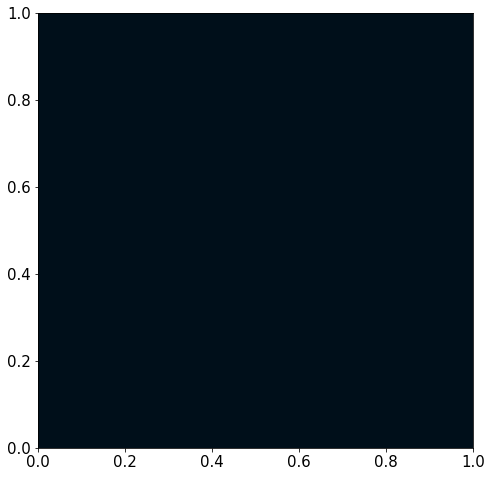

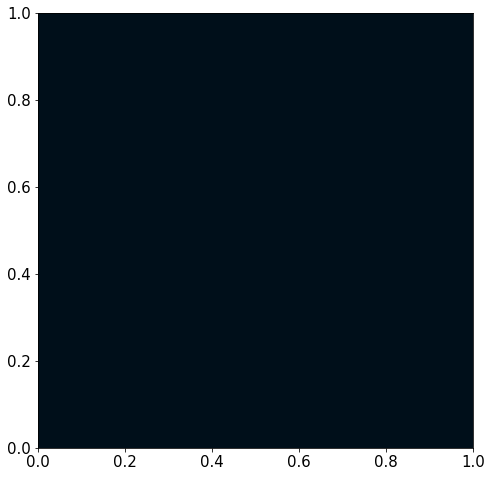

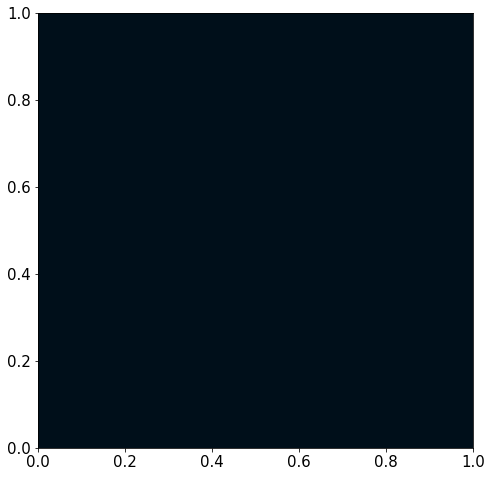

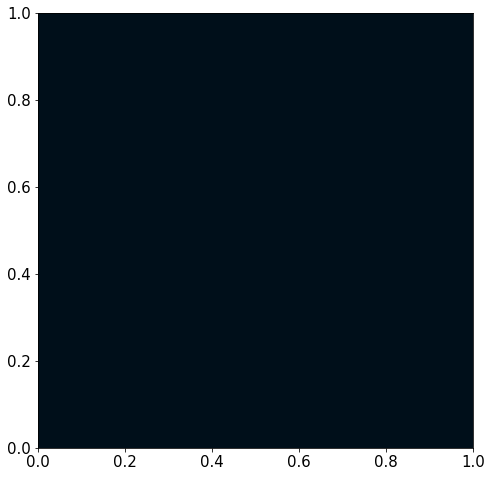

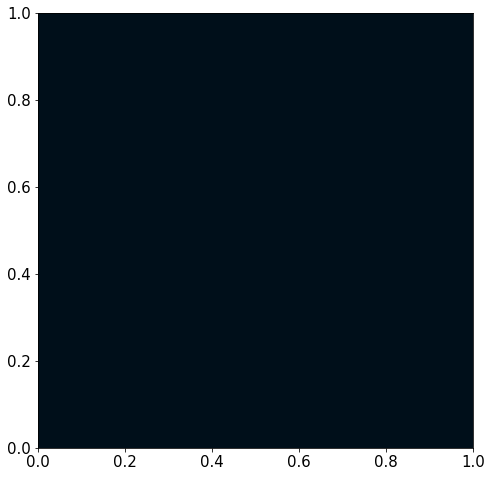

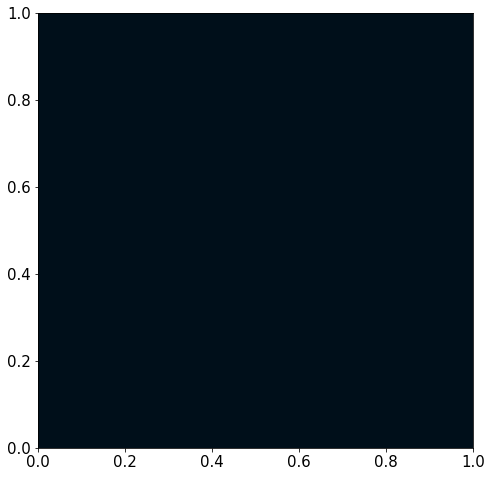

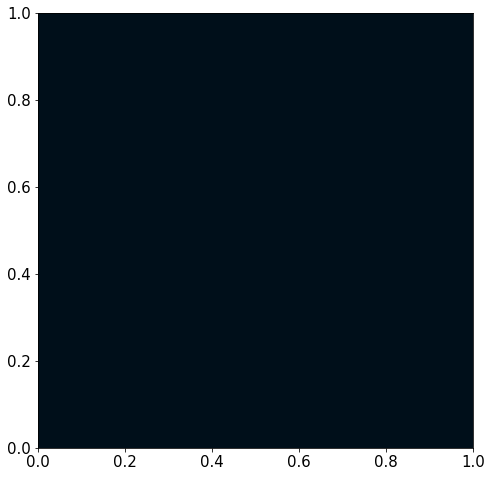

In [3]:
Confirmed_geoframe.crs = {'init' :'epsg:4326'}
Recovered_geoframe.crs = {'init' :'epsg:4326'}
Deaths_geoframe.crs = {'init' :'epsg:4326'}
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs = {'init' :'epsg:4326'}
#Summary_geoframe['alt_scaled']=Summary_geoframe['alt']/3
# We restrict to South America.

#ax = gplt.polyplot(world,figsize=(30, 10))
# # create the colorbar
#norm = colors.Normalize(vmin=-np.max(Summary_geoframe['1/22/20']), vmax=np.max(Summary_geoframe['1/22/20']))
#cbar = plt.cm.ScalarMappable(norm=norm, cmap='green')
# We can now plot our ``GeoDataFrame``.
#gplt.pointplot(Summary_geoframe, ax=ax, hue='MBE', scale='alt', limits=(5, 50),cmap='seismic', legend=False)
s=10
#conf=0
#deat=0
#rec=0
custom_points = [Line2D([0], [0], marker='o', markersize=np.sqrt(20),color='white', linestyle='None'),
               Line2D([0], [0], marker='o', markersize=np.sqrt(20),color='lightgreen', linestyle='None'),
                Line2D([0], [0], marker='o', markersize=np.sqrt(20),color='crimson', linestyle='None')]
colorss=['white',"lightgreen", 'crimson']
for Date in Confirmed_geoframe.iloc[:,4:-1]:
    ax = world.plot(
    color='#2A2A28', edgecolor='#000F1A',figsize=(20, 8))
    #conf+
    #deat+
    #rec+
    conf=Confirmed_geoframe[Date]/35;
    deat=Deaths_geoframe[Date]/35;
    rec=Recovered_geoframe[Date]/35;
    Confirmed_geoframe.plot(ax=ax, markersize=conf, color='white', legend=False, alpha=.8)
    Recovered_geoframe.plot(ax=ax, markersize=rec, color='lightgreen', legend=False, alpha=.8)
    Deaths_geoframe.plot(ax=ax, markersize=deat, color='crimson', legend=False, alpha=.8)
    plt.xlabel('Longitude', size=20)
    plt.ylabel('Latitude', size=20)
    #plt.title('Deaths', size=25, color='red')
    plt.tick_params(axis="both",labelsize=15)
    plt.text(-170,-85,Date, size=25, color="white")
    plt.text(45, -67, int(np.nansum(np.array(Confirmed_geoframe[Date]))), size=18, color="white", fontweight='bold')
    plt.text(45, -78.5, int(np.nansum(np.array(Recovered_geoframe[Date]))), size=18, color="lightgreen", fontweight='bold')
    plt.text(45, -90, int(np.nansum(np.array(Deaths_geoframe[Date]))), size=18, color="crimson", fontweight='bold')
    ax.set_facecolor("#000F1A")
    l=plt.legend(custom_points, ['Confirmed', 'Recovered', 'Deaths'],facecolor='grey', loc="lower center", markerscale=5, fontsize = 18)
    
    i=0
    for text in l.get_texts():
        text.set_color(colorss[i])
        i=i+1
    plt.savefig('Imgs/Frames'+str(s)+'.png',dpi=100)
    ax.clear()
    s=s+1
# add colorbar
#ax_cbar = plt.colorbar(cbar, ax=ax)
# add label for the colorbar
#ax_cbar.set_label('Mean Bias Error (W m$^{-2}$)', size=15)
#ax_cbar.ax.tick_params(labelsize=15)
#plt.savefig('Fig_final/JRA_eval_map',dpi=400)

In [4]:

from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("Imgs/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('Cases_100dpi.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [32]:
Confirmed_geoframe.iloc[:,10:-1]

,Combined_Key,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,"American Samoa, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Guam, US",0,0,0,0,0,0,0,0,0,...,15,27,29,32,37,45,51,55,56,58
2,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,...,21,23,31,39,51,64,79,100,127,174
4,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,...,6,6,7,17,17,17,19,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,"Unassigned, Washington, US",0,0,0,0,0,0,0,0,0,...,146,164,145,112,51,69,67,0,125,274
3249,"Unassigned, West Virginia, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3250,"Unassigned, Wisconsin, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,61,0,0,0
3251,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'white'

In [11]:
int(np.nansum(conf))

60